In [13]:
!pip install xgboost

    100% |████████████████████████████████| 15.8MB 32kB/s eta 0:00:01    90% |█████████████████████████████▏  | 14.4MB 2.7MB/s eta 0:00:01
You are using pip version 18.0, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [14]:
import pandas as pd

In [15]:
import numpy as np

In [16]:
import xgboost as xgb

In [17]:
import sklearn as sk

In [18]:
data=pd.read_csv(r"SPX.csv", index_col=0)

In [19]:
data["Close Return"]=data["Close"].pct_change()

In [20]:
data["Close Return"].plot()

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [21]:
data["Volume Velocity"]=data["Volume"].diff()

In [22]:
data["Volume Acceleration"]=data["Volume Velocity"].diff()

In [23]:
data["Volume Percentage"]=data["Volume"].pct_change()

In [24]:
data["SMA"]=data["Close"].rolling(window=10).mean()

In [25]:
data["EMA"]=data["Close"].ewm(span=30).mean()

In [26]:
data.index=pd.to_datetime(data.index)

In [27]:
data=data.dropna(how="any")

In [28]:
data["Label"]=np.where(data["Close"]>(data["Close"].shift(-1)),0,1)

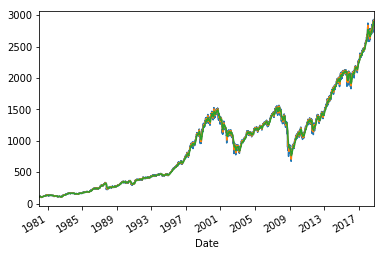

In [29]:
data['Close'].plot()
data['SMA'].plot()
data['EMA'].plot()

In [30]:
train_data = data['1990-01-01':'2010-12-31'].copy()
test_data = data['2011-01-01':'2018-01-01'].copy()

In [31]:
data.to_csv("SanityCheck")

In [32]:
from sklearn.utils import resample

In [33]:
def rebalance(train_data):
    data_minority=train_data[train_data["Label"]==0]
    data_majority = train_data[train_data["Label"] == 1]
    
    n_samples=len(data_majority)
    data_minority_upsampled = resample(data_minority, replace=True, n_samples=n_samples, random_state=5)
    
    data_upsampled = pd.concat([data_majority, data_minority_upsampled])
    data_upsampled.sort_index(inplace=True)
    
    data_upsampled["Label"].value_counts()
    return data_upsampled


In [34]:
train_data = rebalance(train_data)

In [35]:
scaler=sk.preprocessing.MinMaxScaler()
scaler.fit(train_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [36]:
train_data.loc[:, train_data.columns] = scaler.transform(train_data)
test_data.loc[:,test_data.columns] = scaler.transform(test_data)

In [37]:
X_train=train_data.drop("Label",1)
y_train=train_data["Label"]
X_test=test_data.drop("Label",1)
y_test=test_data["Label"]

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
from sklearn.neural_network import MLPClassifier

In [40]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30), activation='relu', alpha=1e-05, learning_rate_init=0.001,max_iter=500)
# We fit the model here
mlp.fit(X_train, y_train)
# And make predictions here
predictions = mlp.predict(X_test)
# Computer Accuracy
accuracytest = accuracy = (accuracy_score(y_test, predictions))
# Print the accuracy
print("Accuracy on test set was {0}%.".format(accuracytest*100))

Accuracy on test set was 48.722316865417376%.


In [41]:
from xgboost import XGBClassifier
# Create the object model as a case of XGBClassifier with the default parameters
model = XGBClassifier()
# Fit the model here
model.fit(X_train, y_train)
# And make predictions here
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# Computer Accuracy
accuracytest = accuracy = (accuracy_score(y_test, predictions))
# Print the accuracy
print("Accuracy on test set was {0}%.".format(accuracytest*100))

Accuracy on test set was 51.05053946621238%.


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [42]:
from sklearn.svm import LinearSVC
# Create the object clf as a case of the LinearSVC with default parameters
clf = LinearSVC(random_state=0, tol=1e-5)
# Train the model here
clf.fit(X_train, y_train)
# And make predictions here
predictions = clf.predict(X_test)
# Computer Accuracy
accuracytest = accuracy = (accuracy_score(y_test, predictions))
# Print the accuracy
print("Accuracy on test set was {0}%.".format(accuracytest*100))

Accuracy on test set was 50.02839295854628%.
